# Regressão logística

In [1]:
# importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from matplotlib.colors import ListedColormap
import matplotlib

In [2]:
# parâmetros de plots
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams.update({'font.size': 18})

Neste exercício iremos realizar a predição se uma pessoa irá comprar ou não um produto anunciado em redes sociais. O dataset para esse problema é carregado a seguir.

In [3]:
# importando o dataset
dataset = pd.read_csv('data/Social_Network_Ads.csv')
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


Variáveis do problema:

In [4]:
# info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [5]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


Não é necessário um tratamento de dados faltantes pois o dataset está completo. Entretanto, escalar as variáveis númericas **Age, EstimatedSalary** é necessário.

Inicialmente, para visualização 2D, somente **Age, EstimatedSalary** serão usadas como variáveis exógenas.

In [6]:
# extraindo as matrizes X e y
X = dataset.iloc[:, 2:4].values
y = dataset.iloc[:, 4].values

In [7]:
# verificação
print('X = \n')
print(X[:5, :])
print('y = \n')
print(y[:5])

X = 

[[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]
y = 

[0 0 0 0 0]


A seguir, é realizada a divisão em treinamento/teste e a normalização das variáveis.

In [8]:
# divisão em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.25,
                                                   random_state = 0,
                                                   stratify = y)

In [9]:
# escalando as variáveis
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float64))
X_test = sc.transform(X_test.astype(np.float64))

Formas de verificação se até o momento as matrizes estão consistentes:

* $X$ é uma matriz de dimensões ($N$ x $n$), onde $N$ é o número de amostras e $n$ é o número de características. Logo as matrizes $X_{train}$, ($N_{train}$ x $n$), e $X_{test}$, ($N_{test}$ x $n$), devem ser tais que $N = N_{train} + N_{test}$. O mesmo ocorre para o vetor $y$.

In [10]:
# verificações de dimensões
assert(X_train.shape[1] == X_test.shape[1] == X.shape[1])
assert(X_train.shape[0] + X_test.shape[0] == X.shape[0])
assert(y_train.shape[0] + y_test.shape[0] == y.shape[0])
assert(X_train.shape[0] == y_train.shape[0])
assert(X_test.shape[0] == y_test.shape[0])

Ajustando os parâmetros do modelo baseado no conjunto de treinamento:

In [11]:
# fit no modelo
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Predições baseadas no conjunto de teste:

In [12]:
# predição no dataset de test
y_pred = classifier.predict(X_test)

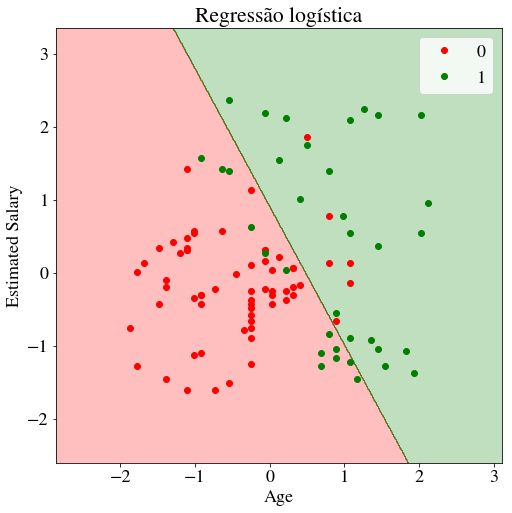

In [13]:
# visualizando a superfície de separação da predição
plt.figure(figsize=(8,8))
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
     plt.plot(X_set[y_set == j, 0], X_set[y_set == j, 1],'o',
                 c=ListedColormap(('red', 'green'))(i),label=j)
plt.title('Regressão logística')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [14]:
# matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[58  6]
 [13 23]]


## Exercício

**Data limite de entrega: 31/05/19. Não deixe para a última hora!**

1. Incluir a variável **Gender** e realizar uma nova predição utilizando utilizando a Regressão Logística. A inclusão dessa nova variável melhorou a predição? Justifique.

2. Escolha algum outro algoritmo de classificação que **não seja a Regressão Logística** e realize a predição nesse mesmo dataset. Qual a matriz de confusão dessa nova predição? Qual dos dois modelos geraram melhores predições?